#Sistem Fuzzy Prediksi Tingkat Curah Hujan

Oleh : 

A. Rifqi Afwan Muslihani (20/462174/PA/20146)

Rangga Rahman Ardiansyah (20/455452/PA/19667)


# Fuzzification


Setting Range dan membership untuk variabel temperature. Selain itu, dilakukan juga deklarasi temperature, humidity, dan wind sebagai variabel input (Antecedent). Adapun rain di deklarasikan sebagai output (Consequent)

In [ ]:
pip install scikit-fuzzy

     |████████████████████████████████| 993 kB 6.7 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=4f3def709f972c62e887b9a27edfbe7fed89309643d66bceeef09d35d283217a
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
temperature = ctrl.Antecedent(np.arange(20, 40, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(55, 100, 5), 'humidity')
wind = ctrl.Antecedent(np.arange(0, 120, 10), 'wind')
rain = ctrl.Consequent(np.arange(0, 140, 5), 'rain')

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
temperature['cold'] = fuzz.trapmf(temperature.universe, [20, 20, 25, 27])
temperature['normal'] = fuzz.trapmf(temperature.universe, [25, 27, 28, 30])
temperature['hot'] = fuzz.trapmf(temperature.universe, [28, 30, 40, 40])

set membership untuk variabel input (antecedent) dan output (Consequent) berdasarkan sistem pakar

In [ ]:
humidity['dry'] = fuzz.trapmf(humidity.universe, [55, 55, 65, 70])
humidity['moist'] = fuzz.trapmf(humidity.universe, [65, 70, 85, 90])
humidity['wet'] = fuzz.trapmf(humidity.universe, [85, 90, 95, 95])

In [ ]:
wind['slow'] = fuzz.trapmf(wind.universe, [0, 0, 10, 20])
wind['normal'] = fuzz.trapmf(wind.universe, [10, 20, 40, 50])
wind['fast'] = fuzz.trapmf(wind.universe, [40, 50, 120, 120])

In [ ]:
rain['low'] = fuzz.trapmf(rain.universe, [0, 0, 40, 45])
rain['medium'] = fuzz.trapmf(rain.universe, [40, 45, 70, 75])
rain['high'] = fuzz.trapmf(rain.universe, [70, 75, 135, 140])

Model mamdani untuk setiap variabel dilihat berdasarkan nilai membership setiap variabelnya

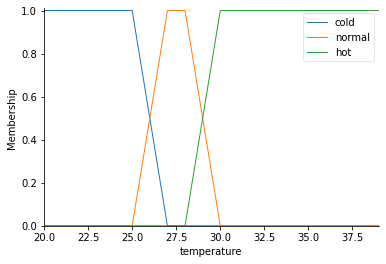

In [ ]:
# You can see how these look with .view()
temperature.view()

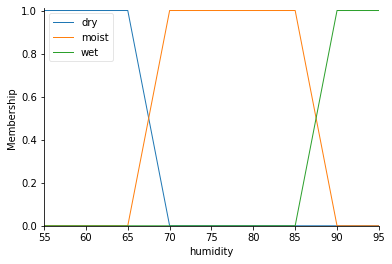

In [ ]:
humidity.view()

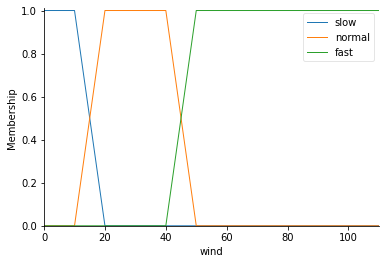

In [ ]:
wind.view()

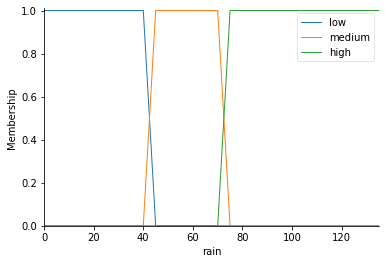

In [ ]:
rain.view()

# Fuzzy Inference engine

Set inference rule menggunakan operator AND berdasarkan sistem pakar

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb9021b7590>)

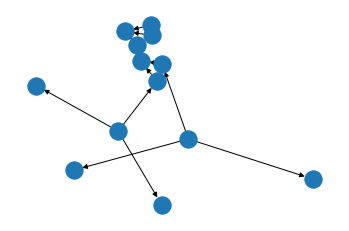

In [ ]:
rule1 = ctrl.Rule(temperature['cold'] & humidity['wet'], rain['high'])
rule2 = ctrl.Rule(temperature['cold'] & humidity['dry'], rain['low'])
rule3 = ctrl.Rule(temperature['cold'] & humidity['moist'], rain['medium'])

rule4 = ctrl.Rule(temperature['normal'] & wind['slow'] & humidity['wet'], rain['medium'])
rule5 = ctrl.Rule(temperature['normal'] & wind['normal'] & humidity['wet'], rain['high'])
rule6 = ctrl.Rule(temperature['normal'] & wind['fast'] & humidity['wet'], rain['high'])
rule7 = ctrl.Rule(temperature['normal'] & humidity['dry'], rain['low'])
rule8 = ctrl.Rule(temperature['normal'] & humidity['moist'], rain['low'])

rule9 = ctrl.Rule(temperature['hot'] & wind['slow'], rain['low'])
rule10 = ctrl.Rule(temperature['hot'] & wind['normal'], rain['medium'])
rule11 = ctrl.Rule(temperature['hot'] & wind['fast'] & humidity['dry'], rain['low'])
rule12 = ctrl.Rule(temperature['hot'] & wind['fast'] & humidity['moist'], rain['low'])
rule13 = ctrl.Rule(temperature['hot'] & wind['fast'] & humidity['wet'], rain['high'])

rule1.view()

In [ ]:
raining_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13])
raining = ctrl.ControlSystemSimulation(raining_ctrl)

# Testing

Dilakukan percobaan dengan memasukan nilai input acak (tetap dalam range berdasarkan rule yang tersedia)

In [ ]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
raining.input['temperature'] = 25.30
raining.input['humidity'] = 85
raining.input['wind'] = 80

# Crunch the numbers
raining.compute()
print(raining.output['rain'])

50.40963797419601


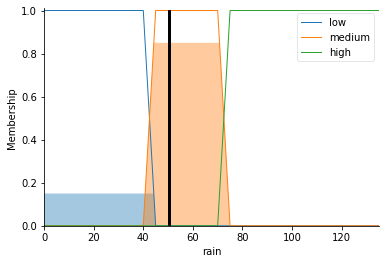

In [ ]:
rain.view(sim=raining)